In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# inverse!
import random as r

# unfortunately it should be square matrix to be inverible
X = [(r.random(), r.random(), r.random(), r.random()) for _ in range(4)]

# some linear combination we don't know
def f(x):
    return x[0] - 2.4*x[1] + 3.01*x[2]

# generate target
y = [[f(x)] for x in X]

X = np.matrix(X)
y = np.matrix(y)

# X[4,4] * A[4,1] = y[4,1]
# A = X^-1 * y
A = X.I * y
print(A)

[[ 1.0000000e+00]
 [-2.4000000e+00]
 [ 3.0100000e+00]
 [ 4.4408921e-16]]


In [3]:
# least square approximations
X = [(r.random(), r.random(), r.random(), r.random()) for _ in range(40000)]

# some linear combination we don't know
def f(x):
    return x[0] - 2.4*x[1] + 3.01*x[2] + (r.random() - 0.5)

# generate target
y = [[f(x)] for x in X]

X = np.matrix(X)
y = np.matrix(y)

# X[40000,4] * A[4,1] = y[40000,1]
A = (X.T * X).I * X.T * y
print(A)

[[ 1.00043901e+00]
 [-2.39724868e+00]
 [ 3.00397033e+00]
 [-1.04427710e-04]]


[[ 1.62746520e+01 -7.56389436e-02 -3.87922663e-01  2.99817005e-01
  -1.62746520e+01]
 [-7.56389436e-02  1.63125676e+01 -1.63182229e+01 -9.96186516e-02
   7.56389436e-02]
 [-3.87922663e-01 -1.63182229e+01  2.31136694e+02 -1.18362661e+00
   3.87922663e-01]
 [ 2.99817005e-01 -9.96186516e-02 -1.18362661e+00  2.65182332e+02
  -2.99817005e-01]
 [-1.62746520e+01  7.56389436e-02  3.87922663e-01 -2.99817005e-01
   1.62746520e+01]]


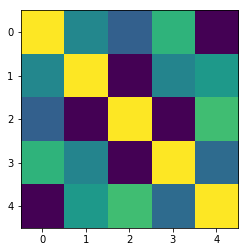

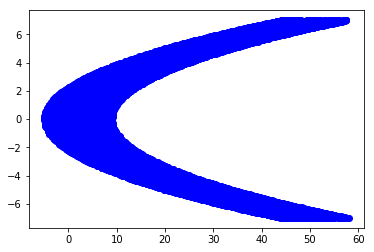

+ 2.00*1 + 0.00*x0 + -1.00*x1 + 1.00*x0^2 + 0.00*x1^1 + -0.00*x0x1 
+ -0.00*1 + 0.00*x0 + -0.00*x1 + 0.00*x0^2 + -0.00*x1^1 + 1.00*x0x1 
+ 1.00*1 + -1.00*x0 + -0.00*x1 + -0.00*x0^2 + -0.00*x1^1 + -0.00*x0x1 


In [4]:
# what about complex figures (noisy circle)
# least square approximations
X = [(r.random() * 14 - 7, r.random() * 14 - 7) for _ in range(40000)]

# some linear combination we don't know
def f(x):
    y1 = 2 + x[0] ** 2 - x[1] + (r.random() - 0.5) * 0.3
    y2 = x[0] * x[1] + (r.random() - 0.5) * 0.3
    y3 = 1 - x[0]
    return y1, y2, y3

# generate target
y = [f(x) for x in X]
together = [(*x, *f(x)) for x in X]

C = np.cov(np.array(together).T)
print(C)
plt.imshow(C, vmax=1,vmin=-1)
plt.show()

# we do have correlations!
plt.plot(np.matrix(y)[:,0], np.matrix(X)[:,0], 'bo')
plt.show()

# precompute features!
X1 = [(1, x[0], x[1], x[0] ** 2, x[1] ** 2, x[0] * x[1]) for x in X]
labels = ['1', 'x0', 'x1', 'x0^2', 'x1^1', 'x0x1']

X = np.matrix(X1)
y = np.matrix(y)

# X[40000,6] * A[6,3] = y[40000,3]
A = (X.T * X).I * X.T * y

for j in range(3):
    for i in range(len(labels)):
        print("+ {:.2f}*{}".format(A[i, j], labels[i]), end=" ")
    print()